In [1]:
from PIL import Image
import os
from os import listdir
from pathlib import Path
import imagehash
import numpy as np
import matplotlib.pyplot as plt
import cv2
import itertools

Count duplicates just to be sure

In [2]:
duplicates = 0
# Get all images from the current directory fro the folder called "sample" and file extensions does not matter ("*")
# Switch this path according to your directory structure
images = Path("../test-images/math-small").glob('*')
# Datastructures for different objects for later processing
# List of images
image_list = []
# List of hashes of the images
hashes_list = []
# List of dictionaries, where the key is the hash of the image, and the value is the name of the image file
hash_image_list = []
# List of hashes of the images, which are similar or close to being similar
similar_pics_hash_list = []

In [3]:
for image in images:
    image_list.append(image)
    # Using average hash, other hash types could be tried for better accuracy
    hashes_list.append(imagehash.average_hash(Image.open(image)))
    entry = {"hash" : imagehash.average_hash(Image.open(image)), "image_file_name" : image}
    hash_image_list.append(entry)

This cutoff value determines the similarity. Smaller for more accurate similarity, larger for not so accurate

In [4]:
cutoff_value = 4
pic_list = []
# Go through the hashes of the images and compare them to each other to find the similar images
for prev, element in itertools.combinations(hash_image_list, 2):
    diff = element["hash"] - prev["hash"]
    if diff < cutoff_value:
        duplicates = duplicates + 1
        pic_list.append((element["image_file_name"], prev["image_file_name"]))
        print("Similar images: " + str(element["image_file_name"]) + " and " + str(prev["image_file_name"]))
        similar_pics_hash_list.append(element["hash"])
        similar_pics_hash_list.append(prev["hash"])
        print("Difference between hashes: " + str(diff))

Similar images: ../test-images/math-small/125620010000640_1.png and ../test-images/math-small/125620010000640_0.png
Difference between hashes: 0
Similar images: ../test-images/math-small/076230010002750_0.png and ../test-images/math-small/076220010003230_0.png
Difference between hashes: 2


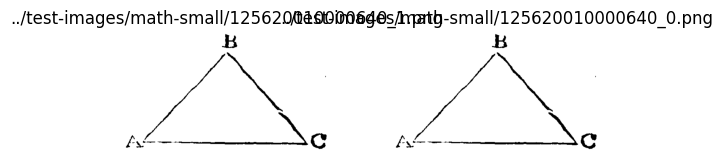

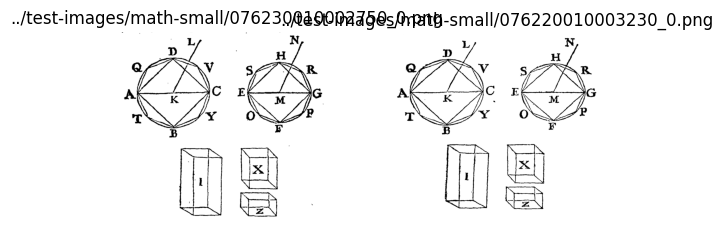

In [5]:
# Print similar images side by side
# This stops the program execution and open the images in an image viewer window
for image in pic_list:
    fig = plt.figure()
    img1 = cv2.imread(str(image[0]))
    img2 = cv2.imread(str(image[1]))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1)
    plt.axis('off')
    plt.title(image[0])
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2)
    plt.axis('off')
    plt.title(image[1])
    plt.show()